# Predicting heart disease patients using machine learning


This notebook will tell if person with a given set of information about his medical attributes have a heart-disease or not

We're going to take the following approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation


# 1. Problem Definition

In a statement
> Given clinical parameters about a patient , can we predict whether or not they have heart-disease

# 2. Data

This dataset came from a Cleveland data from the UCI Machine learning repository

There is a also a version of it available on Kaggle https://www.kaggle.com/datasets/thisishusseinali/uci-heart-disease-data
and on UCI https://archive.ics.uci.edu/ml/datasets/Heart+Disease

# 3. Evaluation
> If we can reach a 95% accuracy at predicting whether or not a patient has heart-disease or not  during the proof of concept 
, we'll pursue the project.


# 4. Features

**Creating a data dictionary**

This is where we will get the differnt information about each of the features of the data

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
* 0: Typical angina: chest pain related decrease blood supply to the heart
* 1: Atypical angina: chest pain not related to heart
* 2: Non-anginal pain: typically esophageal spasms (non heart related)
* 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5.  chol - serum cholestoral in mg/dl
   * serum = LDL + HDL + .2 * triglycerides
   * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
 * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
  * 0: Nothing to note
  * 1: ST-T Wave abnormality
      > can range from mild symptoms to severe problems
      > signals non-normal heart beat
  * 2: Possible or definite left ventricular hypertrophy
      > Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
   * 0: Upsloping: better heart rate with excercise (uncommon)
   * 1: Flatsloping: minimal change (typical healthy heart)
   * 2: Downslopins: signs of unhealthy heart
12.  ca - number of major vessels (0-3) colored by flourosopy
     * colored vessel means the doctor can see the blood passing through
     * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

## Preparing our tools

We are going to use Pandas , Matplotlib and Numpy for data analysis

In [1]:
# Import all the tools we need

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Models from scikitlearn

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation

from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.model_selection import RandomizedSearchCV , GridSearchCV
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.metrics import precision_score , recall_score , f1_score
# from sklearn.metrics import plot_roc_curve

# Load data

In [2]:
df = pd.read_csv("heart-disease.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
df.shape

(303, 14)

In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Data Exploration ( Exploratory data analysis (EDA))

This goal here is to find out more about the data and become a subject matters expert on the dataset we are working with

1. What questions are you trying to solve ?
2. What type of data do you have and how do you treat the different types ?
3. What's missing from the data and how do you deal with it
4. Where are the outliers and why should you care about them ?
5. How can you add , change or remove features to get more out of your data?

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [7]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

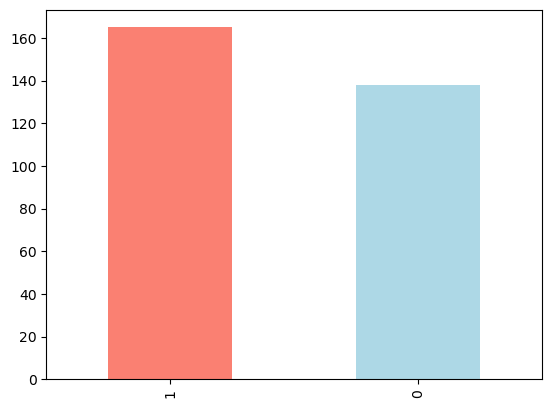

In [8]:
df["target"].value_counts().plot(kind="bar", color={"salmon","lightblue"});

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [12]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# Heart Disease frequency according to Sex

In [13]:
df["sex"].value_counts()

1    207
0     96
Name: sex, dtype: int64

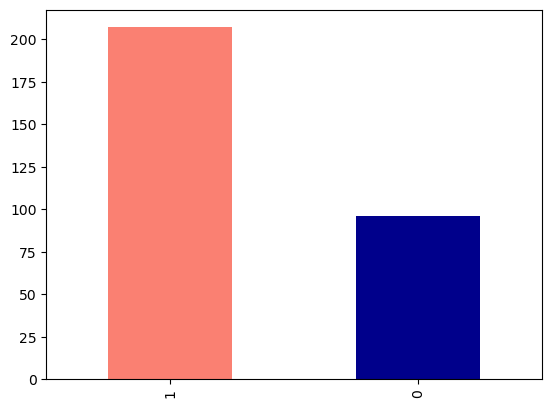

In [14]:
df["sex"].value_counts().plot(kind="bar",color={"salmon","darkblue"});

In [15]:
# Compare target column with sex column 

pd.crosstab(df.target , df.sex)

sex,0,1
target,,
0,24,114
1,72,93


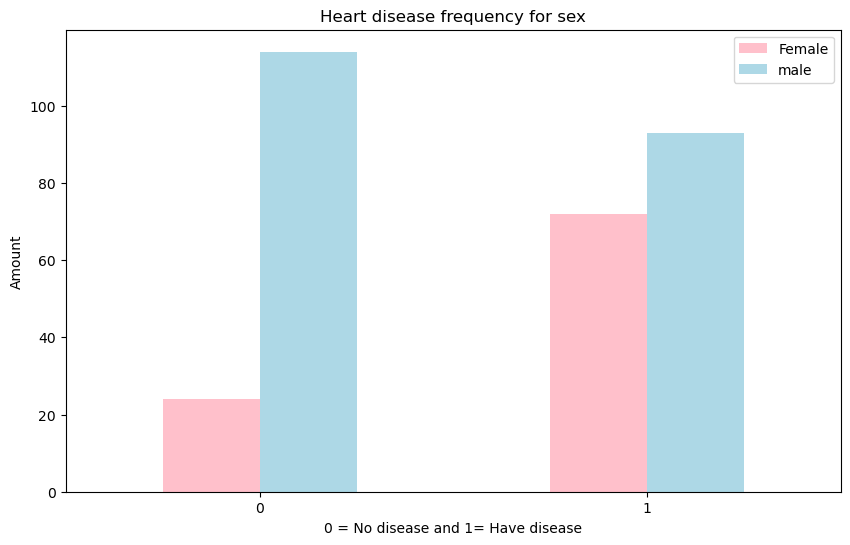

In [16]:
pd.crosstab(df.target , df.sex).plot(kind="bar",color=["pink","lightblue"],figsize=(10,6));
plt.title("Heart disease frequency for sex")
plt.xlabel("0 = No disease and 1= Have disease")
plt.ylabel("Amount")
plt.legend(["Female","male"])
plt.xticks(rotation=0);

In [17]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [18]:
df["thalach"].value_counts()

162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: thalach, Length: 91, dtype: int64

# Age vs Thalach(max Heart Rate) for heart disease

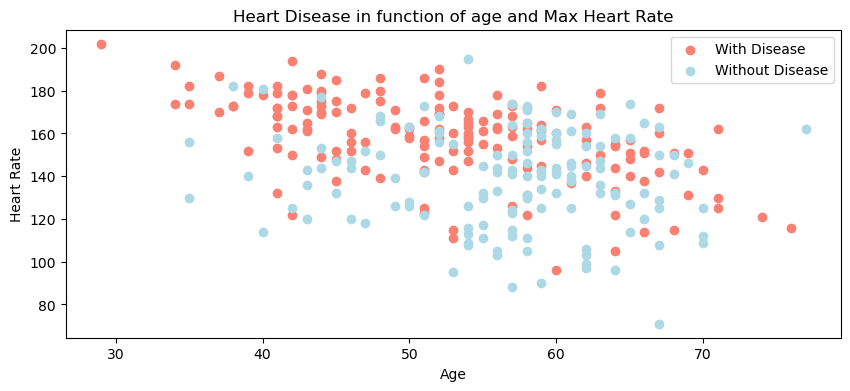

In [19]:
# Create a another figure

plt.figure(figsize=(10,4))

# Create a scatter plot with positive values
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           c="salmon")

# Create a scatter plot with negative values
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           c="lightblue");

# Add some helpful info

plt.title("Heart Disease in function of age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Heart Rate")
plt.legend(["With Disease","Without Disease"]);

In [20]:
# Check the age distribution of the age column with a histgram

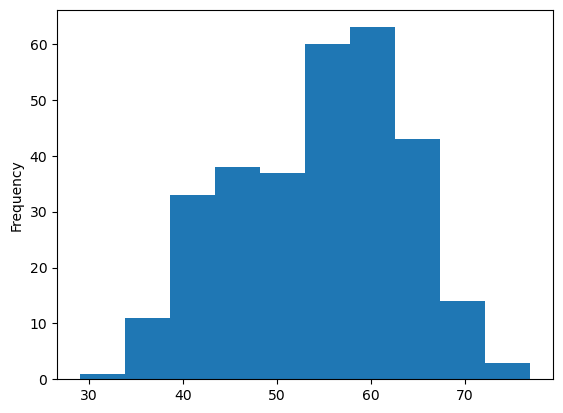

In [21]:
df.age.plot(kind="hist");

# Heart Disease frequency per Chest Disease type

0. Typical angina: chest pain related decrease blood supply to the heart
1. Atypical angina: chest pain not related to heart
2. Non-anginal pain: typically esophageal spasms (non heart related)
3. Asymptomatic: chest pain not showing signs of disease

In [22]:
pd.crosstab(df.cp , df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


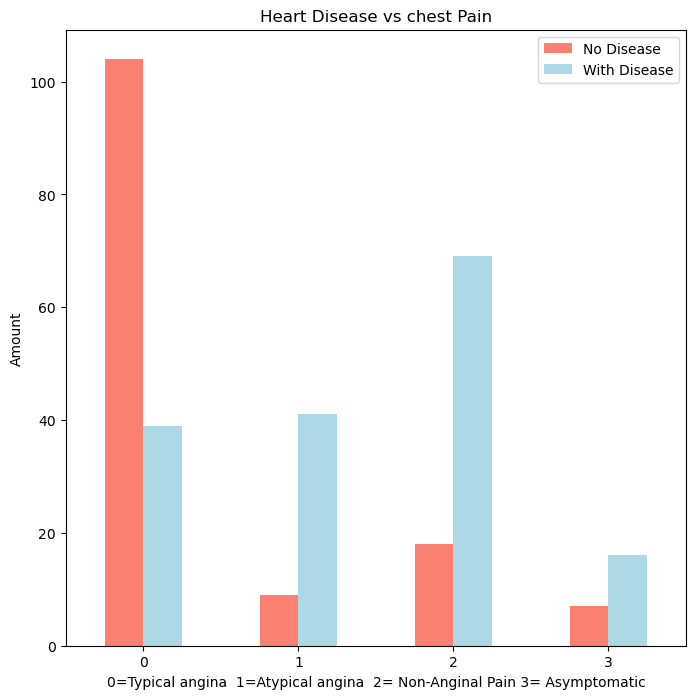

In [23]:
# Make the crosstab more visual

pd.crosstab(df.cp , df.target).plot(kind="bar",color=["salmon","lightblue"],figsize=(8,8))
plt.title("Heart Disease vs chest Pain")
plt.xlabel("0=Typical angina  1=Atypical angina  2= Non-Anginal Pain 3= Asymptomatic")
plt.ylabel("Amount")
plt.legend(["No Disease","With Disease"])
plt.xticks(rotation=0);

In [24]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


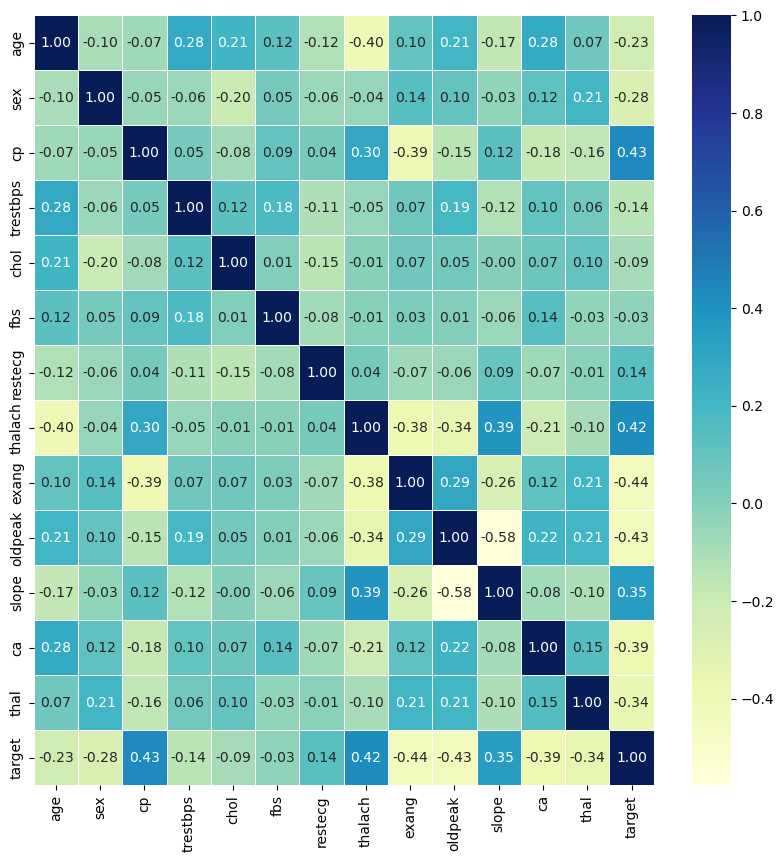

In [25]:
# Lets make our correlation matrix more visual

corr_matrix = df.corr()

fig , ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(corr_matrix,
                 annot = True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu"
                );

In [26]:
# Split into X and y

X = df.drop("target",axis=1)
y = df["target"]



In [27]:
X 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [28]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [29]:
# Split data into train and test split

np.random.seed(42)
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2)


In [30]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [31]:
y_test , len(y_test)

(179    0
 228    0
 111    1
 246    0
 60     1
       ..
 249    0
 104    1
 300    0
 193    0
 184    0
 Name: target, Length: 61, dtype: int64,
 61)

 Now we got our data into training and test data , we will train our data on the training set to find patterns and we will 
 use it to find patterns in our test data   
    
    
 We are going to try 3 different machine learning models :
 1. Linear Regression
 2. K-Nearest Neighbours Classifier
 3. Random Forest Classifier

In [32]:
# Put models in a dictionary

models ={
    "Logistic Regression":LogisticRegression(),
    "KNN":KNeighborsClassifier(),
    "Random Forest":RandomForestClassifier()
}


# Create a function to fit and score models

def fit_and_score(models,X_train , y_train, X_test , y_test):
    """
    Fits and evaluates given machine learning model
    models: a dict of different Scikit-Learn machine learning models
    X_train:training data
    X_test:Testing data
    y_train:Training label
    y_test:Testing label
    """
    
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    
    model_scores={}
    for name , model in models.items():
        # Fit the data to the model
        model.fit(X_train , y_train)
        # Evalaute the model and append it to the model_scores
        model_scores[name] = model.score(X_test , y_test)
        
    return model_scores

In [33]:
models_scores = fit_and_score(models,X_train , y_train, X_test , y_test)

models_scores

C:\Users\akshai\OneDrive\Desktop\ml-course\heart-disease-project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

In [34]:
model_compare = pd.DataFrame(models_scores , index=["accuracy"])
model_compare

,Logistic Regression,KNN,Random Forest
accuracy,0.885246,0.688525,0.836066


In [35]:
model_compare.T

,accuracy
Logistic Regression,0.885246
KNN,0.688525
Random Forest,0.836066


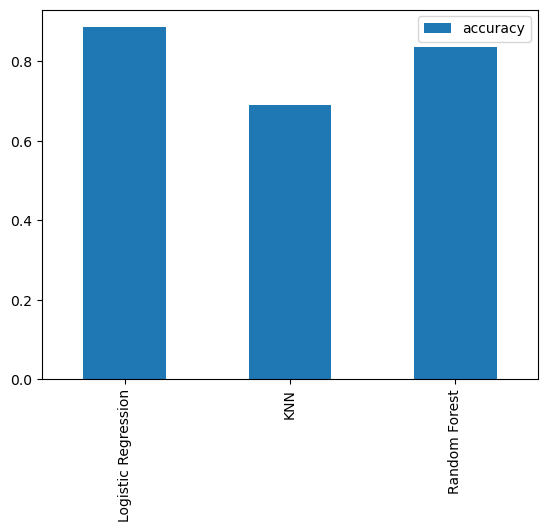

In [36]:
model_compare.T.plot.bar();

Lets look at the following :

* Hyperparameter tuning
* Feature Importance
* Confusion Matrix 
* Cross-validation
* Precison
* Recall
* F1 score
* Classification Report 
* ROC curve
* Area Under the curve

# Hyperparameter tuning

In [37]:
# Lets tune KNN

train_scores = []
test_scores  = []

# Create a list of different values for n_neighbors

neighbors = range(1,21)

# Setup KNN instance

knn = KNeighborsClassifier()

# Loop through different n_neighbours

for i in neighbors:
    knn.set_params(n_neighbors=i)
    
  # Fit the algorithm
    knn.fit(X_train , y_train)
  
  # Upadate the training scores list
    train_scores.append(knn.score(X_train,y_train))
    
  # Update the test score list  
    test_scores.append(knn.score(X_test,y_test))
    

In [38]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [39]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score is :75.41%


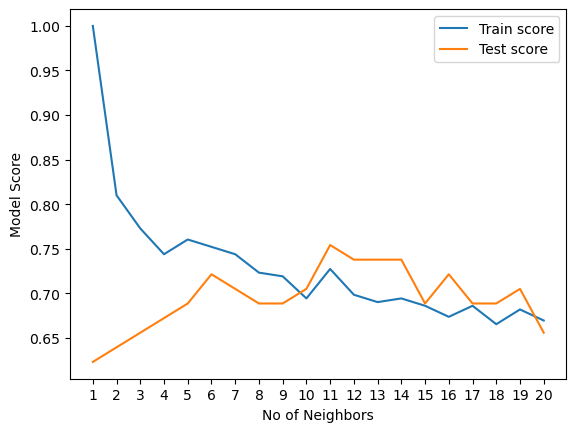

In [40]:
plt.plot(neighbors , train_scores , label="Train score")
plt.plot(neighbors , test_scores , label="Test score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("No of Neighbors")
plt.ylabel("Model Score")
plt.legend();

print(f"Maximum KNN score is :{max(test_scores)*100:.2f}%")

# Hyerparameter tuning with RandomizedSearchCV

We are going to tune:

1. Logistic Regression Model
2. RandomForestClassifier

In [41]:
# Create a hyperparameter grid for LogisticRegression

log_reg_grid = {
    "C":np.logspace(-4,4,20),
   "solver":["liblinear"]
}

# Create a hyperparameter grid for RandomForestClassifier

rf_grid = {
    "n_estimators":np.arange(10,1000,50),
    "max_depth":[None , 3 , 5 , 10],
    "min_samples_split":np.arange(2,20,2),
    "min_samples_leaf":np.arange(1,20,2)
}


In [42]:
np.logspace(-4,10,20)

array([1.00000000e-04, 5.45559478e-04, 2.97635144e-03, 1.62377674e-02,
       8.85866790e-02, 4.83293024e-01, 2.63665090e+00, 1.43844989e+01,
       7.84759970e+01, 4.28133240e+02, 2.33572147e+03, 1.27427499e+04,
       6.95192796e+04, 3.79269019e+05, 2.06913808e+06, 1.12883789e+07,
       6.15848211e+07, 3.35981829e+08, 1.83298071e+09, 1.00000000e+10])

In [43]:
# Tune LogisticRegression

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                 cv=5,
                                n_iter=20,
                                 verbose=5)

# Fit random hyperparameter search model for logisticRegression

rs_log_reg.fit(X_train , y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END ........C=0.0001, solver=liblinear;, score=0.653 total time=   0.0s
[CV 2/5] END ........C=0.0001, solver=liblinear;, score=0.633 total time=   0.0s
[CV 3/5] END ........C=0.0001, solver=liblinear;, score=0.625 total time=   0.0s
[CV 4/5] END ........C=0.0001, solver=liblinear;, score=0.604 total time=   0.0s
[CV 5/5] END ........C=0.0001, solver=liblinear;, score=0.750 total time=   0.0s
[CV 1/5] END C=0.00026366508987303583, solver=liblinear;, score=0.694 total time=   0.0s
[CV 2/5] END C=0.00026366508987303583, solver=liblinear;, score=0.673 total time=   0.0s
[CV 3/5] END C=0.00026366508987303583, solver=liblinear;, score=0.625 total time=   0.0s
[CV 4/5] END C=0.00026366508987303583, solver=liblinear;, score=0.625 total time=   0.0s
[CV 5/5] END C=0.00026366508987303583, solver=liblinear;, score=0.729 total time=   0.0s
[CV 1/5] END C=0.0006951927961775605, solver=liblinear;, score=0.735 total time=   0.0s


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=5)

In [44]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [45]:
rs_log_reg.score(X_test,y_test)

0.8852459016393442

# Now we will tune RandomForestClassifier

In [46]:
np.random.seed(42)

# Setup hyperparameter search for RandomForestClassifier

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=rf_grid,
                          n_iter = 20,
                          cv=5,
                          verbose=5)
# Fit random hyperparameter search model for RandomForestClassifier

rs_rf.fit(X_train , y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=10;, score=0.816 total time=   0.0s
[CV 2/5] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=10;, score=0.857 total time=   0.0s
[CV 3/5] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=10;, score=0.792 total time=   0.0s
[CV 4/5] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=10;, score=0.792 total time=   0.0s
[CV 5/5] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=10;, score=0.812 total time=   0.0s
[CV 1/5] END max_depth=5, min_samples_leaf=19, min_samples_split=18, n_estimators=510;, score=0.816 total time=   1.3s
[CV 2/5] END max_depth=5, min_samples_leaf=19, min_samples_split=18, n_estimators=510;, score=0.857 total time=   1.3s
[CV 3/5] END max_depth=5, min_samples_leaf=19, min_samples_split=18, n_estimators=510;, score=0.812 

[CV 5/5] END max_depth=3, min_samples_leaf=19, min_samples_split=4, n_estimators=210;, score=0.833 total time=   0.5s
[CV 1/5] END max_depth=3, min_samples_leaf=15, min_samples_split=12, n_estimators=560;, score=0.837 total time=   1.5s
[CV 2/5] END max_depth=3, min_samples_leaf=15, min_samples_split=12, n_estimators=560;, score=0.878 total time=   1.4s
[CV 3/5] END max_depth=3, min_samples_leaf=15, min_samples_split=12, n_estimators=560;, score=0.812 total time=   1.4s
[CV 4/5] END max_depth=3, min_samples_leaf=15, min_samples_split=12, n_estimators=560;, score=0.833 total time=   1.5s
[CV 5/5] END max_depth=3, min_samples_leaf=15, min_samples_split=12, n_estimators=560;, score=0.792 total time=   1.5s
[CV 1/5] END max_depth=3, min_samples_leaf=13, min_samples_split=4, n_estimators=960;, score=0.816 total time=   2.5s
[CV 2/5] END max_depth=3, min_samples_leaf=13, min_samples_split=4, n_estimators=960;, score=0.837 total time=   2.6s
[CV 3/5] END max_depth=3, min_samples_leaf=13, min_

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=5)

In [47]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [48]:
rs_rf.score(X_test , y_test)

0.8688524590163934

# Hyperparameter Tuning with GridSearchCV

Since our LogisiticRegression model provides the best scores so far , we'll try and improve them again using GridSearchCV

In [49]:
# Different hyperparameters for our LogisticRegression model 

log_reg_grid = {
           "C":np.logspace(-4,4,30),
           "solver":['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
            "penalty":['l1','l2'],
            }

gs_log_grid = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# fit grid hyperparameter search model

gs_log_grid.fit(X_train , y_train)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


C:\Users\akshai\OneDrive\Desktop\ml-course\heart-disease-project\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\akshai\OneDrive\Desktop\ml-course\heart-disease-project\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\akshai\OneDrive\Desktop\ml-course\heart-disease-project\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\akshai\OneDrive\Desktop\ml-course\heart-disease-project\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\akshai\OneDrive\Desktop\ml-course\heart-disease-project\env\Lib\site-packages\sklearn\linear_model\_sag

C:\Users\akshai\OneDrive\Desktop\ml-course\heart-disease-project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\akshai\OneDrive\Desktop\ml-course\heart-disease-project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
   

C:\Users\akshai\OneDrive\Desktop\ml-course\heart-disease-project\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\akshai\OneDrive\Desktop\ml-course\heart-disease-project\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\akshai\OneDrive\Desktop\ml-course\heart-disease-project\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\akshai\OneDrive\Desktop\ml-course\heart-disease-project\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\akshai\OneDrive\Desktop\ml-course\heart-disease-project\env\Lib\site-packages\sklearn\linear_model\_log

C:\Users\akshai\OneDrive\Desktop\ml-course\heart-disease-project\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\akshai\OneDrive\Desktop\ml-course\heart-disease-project\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\akshai\OneDrive\Desktop\ml-course\heart-disease-project\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\akshai\OneDrive\Desktop\ml-course\heart-disease-project\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\akshai\OneDrive\Desktop\ml-course\heart-disease-project\env\Lib\site-packages\sklearn\linear_model\_sag

C:\Users\akshai\OneDrive\Desktop\ml-course\heart-disease-project\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\akshai\OneDrive\Desktop\ml-course\heart-disease-project\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\akshai\OneDrive\Desktop\ml-course\heart-disease-project\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\akshai\OneDrive\Desktop\ml-course\heart-disease-project\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\akshai\OneDrive\Desktop\ml-course\heart-disease-project\env\Lib\site-packages\sklearn\linear_model\_sag

C:\Users\akshai\OneDrive\Desktop\ml-course\heart-disease-project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\akshai\OneDrive\Desktop\ml-course\heart-disease-project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
   

C:\Users\akshai\OneDrive\Desktop\ml-course\heart-disease-project\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\akshai\OneDrive\Desktop\ml-course\heart-disease-project\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\akshai\OneDrive\Desktop\ml-course\heart-disease-project\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\akshai\OneDrive\Desktop\ml-course\heart-disease-project\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\akshai\OneDrive\Desktop\ml-course\heart-disease-project\env\Lib\site-packages\sklearn\linear_model\_sag

C:\Users\akshai\OneDrive\Desktop\ml-course\heart-disease-project\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\akshai\OneDrive\Desktop\ml-course\heart-disease-project\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\akshai\OneDrive\Desktop\ml-course\heart-disease-project\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\akshai\OneDrive\Desktop\ml-course\heart-disease-project\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\akshai\OneDrive\Desktop\ml-course\heart-disease-project\env\Lib\site-packages\sklearn\linear_model\_sag

C:\Users\akshai\OneDrive\Desktop\ml-course\heart-disease-project\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\akshai\OneDrive\Desktop\ml-course\heart-disease-project\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\akshai\OneDrive\Desktop\ml-course\heart-disease-project\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\akshai\OneDrive\Desktop\ml-course\heart-disease-project\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\akshai\OneDrive\Desktop\ml-course\heart-disease-project\env\Lib\site-packages\sklearn\linear_model\_sag

C:\Users\akshai\OneDrive\Desktop\ml-course\heart-disease-project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\akshai\OneDrive\Desktop\ml-course\heart-disease-project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
   

C:\Users\akshai\OneDrive\Desktop\ml-course\heart-disease-project\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\akshai\OneDrive\Desktop\ml-course\heart-disease-project\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\akshai\OneDrive\Desktop\ml-course\heart-disease-project\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\akshai\OneDrive\Desktop\ml-course\heart-disease-project\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\akshai\OneDrive\Desktop\ml-course\heart-disease-project\env\Lib\site-packages\sklearn\linear_model\_sag

C:\Users\akshai\OneDrive\Desktop\ml-course\heart-disease-project\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\akshai\OneDrive\Desktop\ml-course\heart-disease-project\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\akshai\OneDrive\Desktop\ml-course\heart-disease-project\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\akshai\OneDrive\Desktop\ml-course\heart-disease-project\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\akshai\OneDrive\Desktop\ml-course\heart-disease-project\env\Lib\site-packages\sklearn\linear_model\_sag

C:\Users\akshai\OneDrive\Desktop\ml-course\heart-disease-project\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\akshai\OneDrive\Desktop\ml-course\heart-disease-project\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\akshai\OneDrive\Desktop\ml-course\heart-disease-project\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\akshai\OneDrive\Desktop\ml-course\heart-disease-project\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\akshai\OneDrive\Desktop\ml-course\heart-disease-project\env\Lib\site-packages\sklearn\linear_model\_sag

C:\Users\akshai\OneDrive\Desktop\ml-course\heart-disease-project\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\akshai\OneDrive\Desktop\ml-course\heart-disease-project\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\akshai\OneDrive\Desktop\ml-course\heart-disease-project\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\akshai\OneDrive\Desktop\ml-course\heart-disease-project\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\akshai\OneDrive\Desktop\ml-course\heart-disease-project\env\Lib\site-packages\sklearn\linear_model\_sag

C:\Users\akshai\OneDrive\Desktop\ml-course\heart-disease-project\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\akshai\OneDrive\Desktop\ml-course\heart-disease-project\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\akshai\OneDrive\Desktop\ml-course\heart-disease-project\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\akshai\OneDrive\Desktop\ml-course\heart-disease-project\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\akshai\OneDrive\Desktop\ml-course\heart-disease-project\env\Lib\site-packages\sklearn\linear_model\_sag

C:\Users\akshai\OneDrive\Desktop\ml-course\heart-disease-project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\akshai\OneDrive\Desktop\ml-course\heart-disease-project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
   

C:\Users\akshai\OneDrive\Desktop\ml-course\heart-disease-project\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\akshai\OneDrive\Desktop\ml-course\heart-disease-project\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\akshai\OneDrive\Desktop\ml-course\heart-disease-project\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\akshai\OneDrive\Desktop\ml-course\heart-disease-project\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\akshai\OneDrive\Desktop\ml-course\heart-disease-project\env\Lib\site-packages\sklearn\linear_model\_sag

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             verbose=True)

In [50]:
# Check the best params
gs_log_grid.best_params_

{'C': 0.20433597178569418, 'penalty': 'l2', 'solver': 'liblinear'}

In [51]:
gs_log_grid.score(X_test , y_test)

0.8852459016393442

# Evaluating our tuned machine learning model

* ROC and AUC curve
* Confusion matrix
* Classificationn Report 
* Precison
* F1 score
* Recall

To make comparsions on our trained model , first we need to make predictions

In [52]:
# Make predictions with tuned model

y_preds = gs_log_grid.predict(X_test)
y_preds

y_probs = gs_log_grid.predict_proba(X_test)
y_probs

y_probs_positive = y_probs[:,1]
y_probs_positive

array([0.13274722, 0.75591487, 0.8145242 , 0.05469223, 0.88453354,
       0.870703  , 0.60512177, 0.00435981, 0.01376377, 0.56138448,
       0.71720805, 0.11904145, 0.88730101, 0.06005038, 0.96750061,
       0.93181122, 0.96404703, 0.09452762, 0.01769764, 0.02646363,
       0.71543132, 0.02727601, 0.14274674, 0.71660802, 0.88198278,
       0.69480593, 0.84234226, 0.69335554, 0.01830938, 0.87782372,
       0.07150759, 0.06684154, 0.01510284, 0.14314494, 0.60229498,
       0.12640328, 0.6633502 , 0.85079078, 0.81898322, 0.84121546,
       0.54515807, 0.79250826, 0.77817587, 0.70538843, 0.83243213,
       0.02112998, 0.73216374, 0.93234387, 0.10276676, 0.06440749,
       0.13470644, 0.03554555, 0.80441969, 0.95312794, 0.31714632,
       0.00309602, 0.08734717, 0.93823574, 0.02813801, 0.01309874,
       0.06291752])

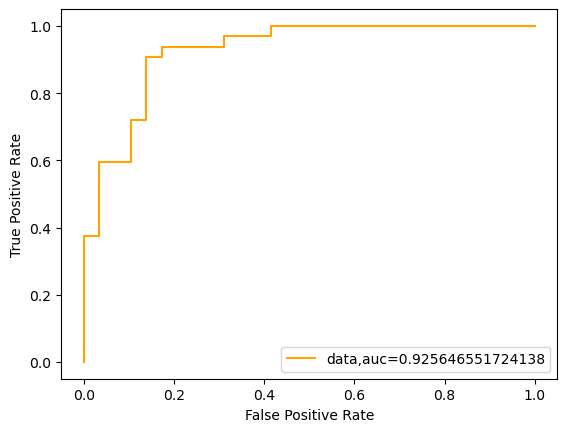

In [53]:
# Plot roc curve and calculate auc metric
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr , tpr , thresholds = roc_curve(y_test , y_probs_positive)

auc = roc_auc_score(y_test , y_probs_positive)

plt.plot(fpr,tpr,label="data,auc="+str(auc),color="orange")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend();


In [54]:
# Confusion matrix

print(confusion_matrix(y_test , y_preds))

[[25  4]
 [ 3 29]]


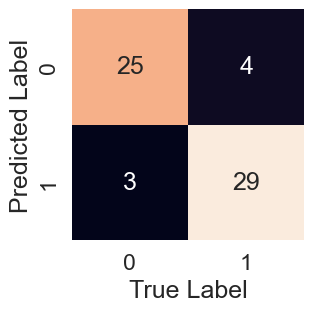

In [55]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test , y_preds):
    
    """
    Plots a nice confusion matrix using seaborn heatmap
    """
    
    fig , ax = plt.subplots(figsize=(3,3))
    
    ax = sns.heatmap(confusion_matrix(y_test , y_preds),
                    annot=True,
                     cbar=False, # cbar matlab color bar jo light to dark type ka ek bar diktha hein 
                    )
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")

plot_conf_mat(y_test , y_preds);

In [56]:
# Now we have got a roc curve , an auc metric and confusion matrix

# Now we will look into classification report , f1 score , precision and recall

In [57]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



# Calculate evaluation metrics using cross validation

We are going to calculate recall , precision and f1 score using cross validation

In [58]:
# Check the best hyperparameters

gs_log_grid.best_params_

{'C': 0.20433597178569418, 'penalty': 'l2', 'solver': 'liblinear'}

In [59]:
clf = LogisticRegression(C=0.20433597178569418,
                        solver="liblinear")

In [61]:
# Cross validated accuracy
cv_acc = cross_val_score(clf , X , y , cv=5 , scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [62]:
cv_acc.mean()

0.8446994535519124

In [63]:
# Cross validated precision

cv_prec = cross_val_score(clf , X , y , cv=5 , scoring="precision")
cv_prec

array([0.775     , 0.88571429, 0.85714286, 0.86111111, 0.725     ])

In [64]:
cv_prec.mean()

0.8207936507936507

In [65]:
# Cross validated recall score

cv_rec = cross_val_score(clf , X , y , cv=5 , scoring="recall")
cv_rec

array([0.93939394, 0.93939394, 0.90909091, 0.93939394, 0.87878788])

In [66]:
cv_rec.mean()

0.9212121212121213

In [67]:
# Cross Validated f1 score

cv_f1 = cross_val_score(clf , X , y , cv=5 , scoring="f1")
cv_f1

array([0.84931507, 0.91176471, 0.88235294, 0.89855072, 0.79452055])

In [68]:
cv_f1.mean()

0.8673007976269721

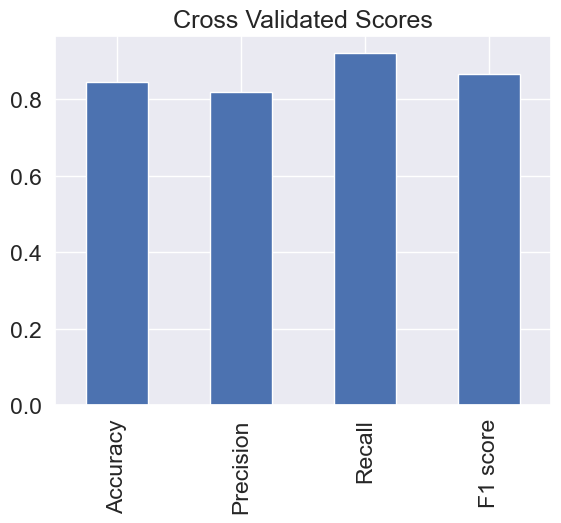

In [79]:
# Visualize cross-validated metrics

cv_metrics = pd.DataFrame({"Accuracy":cv_acc.mean(),
                           "Precision":cv_prec.mean(),
                            "Recall":cv_rec.mean(),
                             "F1 score":cv_f1.mean(),
                           },
                           index=[0]
                         )

# dictionary mein jo key vala hota hein na vo y hota hein aur jab transpose karte hein vo x ho jata hein 
cv_metrics.T.plot.bar(title="Cross Validated Scores",legend=False);

# Feature Importance

Feature importance is another way of asking , "which features contributed most of the outcomes of the model and how did they contribute?"


Finding feature importance is different for each machine learning model

In [80]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [82]:
gs_log_grid.best_params_

{'C': 0.20433597178569418, 'penalty': 'l2', 'solver': 'liblinear'}

In [83]:
clf = LogisticRegression(C=0.20433597178569418,
                        solver="liblinear")
clf.fit(X_train , y_train);

In [84]:
# Check the coeff
clf.coef_

array([[ 0.00316728, -0.86044674,  0.66067031, -0.01156993, -0.00166375,
         0.04386101,  0.31275865,  0.02459362, -0.60413094, -0.56862789,
         0.45051632, -0.63609908, -0.67663375]])

In [86]:
# Match the coeff of features to the column 

feature_dic  = dict(zip(df.columns , clf.coef_[0]))
feature_dic

{'age': 0.0031672830780218957,
 'sex': -0.8604467440762573,
 'cp': 0.6606703120090932,
 'trestbps': -0.011569932037408597,
 'chol': -0.00166374523064295,
 'fbs': 0.043861009724542044,
 'restecg': 0.3127586507840532,
 'thalach': 0.024593615555173243,
 'exang': -0.6041309439103262,
 'oldpeak': -0.5686278914396258,
 'slope': 0.4505163222528207,
 'ca': -0.6360990763634887,
 'thal': -0.6766337475895309}

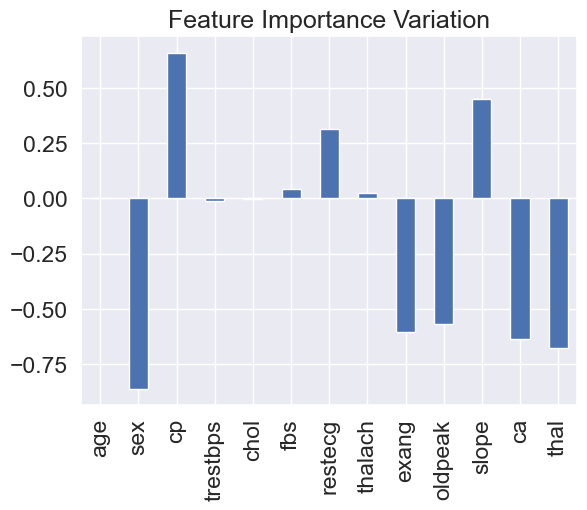

In [88]:
# Visualize feature importance

feature_importance = pd.DataFrame(feature_dic, index=[0])

feature_importance.T.plot.bar(legend=False , title="Feature Importance Variation");

In [89]:
pd.crosstab(df["sex"],df["target"])

target,0,1
sex,,
0,24,72
1,114,93


In [94]:
114/24 , 93/72

(4.75, 1.2916666666666667)

In [92]:
pd.crosstab(df["slope"],df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


11. slope - the slope of the peak exercise ST segment
   * 0: Upsloping: better heart rate with excercise (uncommon)
   * 1: Flatsloping: minimal change (typical healthy heart)
   * 2: Downslopins: signs of unhealthy heart

# Experimentation

* Could we collect data
* Could we try a better model like xgBoost or catBoost
* Could we improve the current model
